# Introduction

This notebook is intended to extract useful insights for the datasets of ‘Tabular Playground Series - Mar 2021’ competition in Kaggle. For this competition, it is required to tackle the Classification problem to predict a continuous target based on a number of feature columns given in the data. All of the feature columns, cat0 - cat9 are categorical, and the feature columns cont0 - cont13 are continuous.

We are going to do the feature importance detection for raw features only, using Featurewiz (https://github.com/AutoViML/featurewiz)



In [1]:
#!pip install featurewiz

# Initial Preparations

We are going to start with the essential pre-requisites as follows

- installing *featurewiz* into this notebook
- importing the standard Python packages we need to use down the road
- programming the useful automation routines for repeatable data visualizations we are going to draw in the Advance Analytical EDA trials down the road

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
from typing import Tuple, List, Dict

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline


# read data
in_kaggle = False

def get_data_file_path(is_in_kaggle: bool) -> Tuple[str, str, str]:
    train_path = ''
    test_path = ''
    sample_submission_path = ''

    if is_in_kaggle:
        # running in Kaggle, inside the competition
        train_path = '../input/tabular-playground-series-mar-2021/train.csv'
        test_path = '../input/tabular-playground-series-mar-2021/test.csv'
        sample_submission_path = '../input/tabular-playground-series-mar-2021/sample_submission.csv'
    else:
        # running locally
        train_path = 'data/train.csv'
        test_path = 'data/test.csv'
        sample_submission_path = 'data/sample_submission.csv'

    return train_path, test_path, sample_submission_path



C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# main flow
start_time = dt.datetime.now()
print("Started at ", start_time)

Started at  2021-04-18 23:10:39.923382


In [4]:
%%time
# get the training set and labels
train_set_path, test_set_path, sample_subm_path = get_data_file_path(in_kaggle)

df_train = pd.read_csv(train_set_path)
df_test = pd.read_csv(test_set_path)

subm = pd.read_csv(sample_subm_path)

Wall time: 1.66 s


# Basic Data Overview

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

# Feature Importance of Raw Features

We are going to invoke *featurewiz*, one of the prominent freeware Pythonic AutoML Feature Selection tools, to quickly identify the essential predictors

Imported featurewiz: Auto_ViML's feature engg and selection library. Version=0.0.18
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Let featurewiz add features to your data! Set 'feature_engg' as: 'interactions' or 'groupby' or 'target'
                                
Skipping feature engineering since no feature_engg input...
Shape of your Data Set loaded: (300000, 32)
Number of GPUs = 1
    No GPU active on this device
    Running XGBoost using CPU parameters
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    31 Predictors classified...
        5 variable(s) removed since they were ID or low-information variables
#### Single_Label Binary_Classification Feature Selection Started ####
Starting feature engineering...this will take time...
Source X_train shape:  (300000, 26) | X_test shape:  

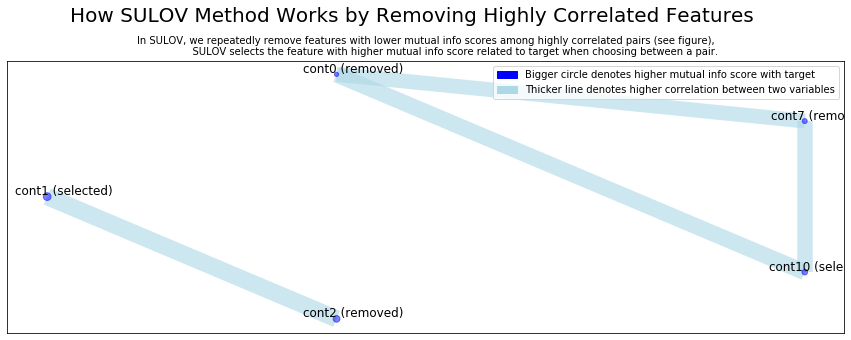

    Adding 0 categorical variables to reduced numeric variables  of 23
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 23 
    Finding Important Features using Boosted Trees algorithm...
        using 23 variables...
        using 18 variables...
        using 13 variables...
        using 8 variables...
        using 3 variables...
Selected 15 important features from your dataset
    Time taken (in seconds) = 140
Returning list of 15 important features and dataframe.
Returning 2 dataframes: train and test with 15 important features.


In [6]:
from featurewiz import featurewiz

# out1 and out2: is always a tuple containing two objects. 
# In our case, it is going to be "test" and "train" dataframes with the important features selected by featurewiz
trainm, testm = featurewiz(
    df_train, 
    target='target', 
    corr_limit=0.7, 
    verbose=2, 
    sep=",",
    header=0,
    test_data=df_test,     
    feature_engg="", # we do not want featurewiz to create any additional features in this experiment
    category_encoders="FrequencyEncoder" #OrdinalEncoder
)

In [7]:
# check the important features detected by featurewiz
display(trainm.columns)

Index(['FrequencyEncoder_cat16', 'FrequencyEncoder_cat15',
       'FrequencyEncoder_cat18', 'FrequencyEncoder_cat0',
       'FrequencyEncoder_cat14', 'FrequencyEncoder_cat11',
       'FrequencyEncoder_cat13', 'FrequencyEncoder_cat17',
       'FrequencyEncoder_cat1', 'cont5', 'FrequencyEncoder_cat4',
       'FrequencyEncoder_cat2', 'cont1', 'FrequencyEncoder_cat6', 'cont10',
       'target'],
      dtype='object')

In [8]:
print('We are done. That is all, folks!')
finish_time = dt.datetime.now()
print("Finished at ", finish_time)
elapsed = finish_time - start_time
print("Elapsed time: ", elapsed)

We are done. That is all, folks!
Finished at  2021-04-18 23:13:02.902602
Elapsed time:  0:02:22.979220


# Results of Experiments

Below are the important raw features selected by featurewiz under different category encoding techniques applied
- Cats without encoding: ('cat16', 'cat15', 'cat0', 'cat18', 'cat14', 'cat11', 'cat13', 'cat17', 'cat4', 'cat1', 'cat2', 'cat12')
- OrdinalEncoder applied: ('OrdinalEncoder_cat16', 'OrdinalEncoder_cat15', 'OrdinalEncoder_cat0', 'OrdinalEncoder_cat18', 'OrdinalEncoder_cat14', 'OrdinalEncoder_cat11', 'OrdinalEncoder_cat13', 'OrdinalEncoder_cat1', 'OrdinalEncoder_cat17', 'cont5', 'OrdinalEncoder_cat4', 'cont1', 'OrdinalEncoder_cat2', 'cont10')
- FrequencyEncoder applied: ('FrequencyEncoder_cat16', 'FrequencyEncoder_cat15', 'FrequencyEncoder_cat18', 'FrequencyEncoder_cat0','FrequencyEncoder_cat14', 'FrequencyEncoder_cat11', 'FrequencyEncoder_cat13', 'FrequencyEncoder_cat17','FrequencyEncoder_cat1', 'cont5', 'FrequencyEncoder_cat4','FrequencyEncoder_cat2', 'cont1', 'FrequencyEncoder_cat6', 'cont10')

As we can see, the same set of raw features selected for the final model in the cases of OrdinalEncoder and FrequencyEncoder applied. However, in the case when we relied on the default category handler of featurewiz, it did not detect any continual variable to be important at the end.

# References

- [featurewiz repo](https://github.com/AutoViML/featurewiz)